In [ ]:
import pandas as pd
import numpy as np
df1=pd.read_csv("D:\\Data Science\\Swiggy1.csv")

In [ ]:
print("COUNT OF NULL VALUES IN EACH COLUMN\n",df1.isnull().sum(),"\n\n")

COUNT OF NULL VALUES IN EACH COLUMN
 Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Address                       2
Long Distance Delivery        0
dtype: int64 




In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean');
imputer = imputer.fit(df1.iloc[:,2:3])
df1.iloc[:,2:3] = imputer.transform(df1.iloc[:,2:3])
df1=df1.dropna()
print("COUNT OF NULL VALUES IN EACH COLUMN\n",df1.isnull().sum(),"\n\n")

COUNT OF NULL VALUES IN EACH COLUMN
 Restaurant Name           0
Category                  0
Rating                    0
Cost for two              0
Veg                       0
city                      0
Area                      0
Locality                  0
Address                   0
Long Distance Delivery    0
dtype: int64 




In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model=scaler.fit(df1.iloc[:,2:4])
df1.iloc[:,2:4]=model.transform(df1.iloc[:,2:4])

# print scaled features
df1

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",0.717949,0.129032,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,0.820513,0.129032,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",0.743590,0.112903,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",0.794872,0.048387,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",0.769231,0.129032,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0
...,...,...,...,...,...,...,...,...,...,...
31799,Khukri Desi Mutton & Chicken Point,"Indian,Biryani,Beverages",0.719935,0.096774,False,Bareilly,Pheonix Mall,Phoenix Mall,Parvana Nagar Opp.Jingel Bell Public School Pi...,1
31800,Monis Restaurant,"South Indian,Chinese,Snacks,Desserts,North Indian",0.719935,0.080645,True,Bareilly,Suncity Vistaar,Phoenix Mall,6 B Shop No.1 Vatika Suncity Vistaar Bareilly ...,1
31801,T3 Tasty Table Talks,"Indian,Thalis",0.719935,0.064516,True,Bareilly,MahaNagar Colony,Phoenix Mall,"117, Utsav-II, Ujjwal Phase - 1, Mahanagar Col...",1
31802,The Green Lemon,Indian,0.719935,0.129032,False,Bareilly,Chhoti Vihar,Phoenix Mall,Gate-1 Ashutosh City Near Phoenix Mall Pilibhi...,1


In [ ]:
from sklearn.preprocessing import normalize
x_normalize=normalize(df1.iloc[:,2:4],norm='l1')
x=pd.DataFrame(x_normalize)
x

,0,1
0,0.847656,0.152344
1,0.864111,0.135889
2,0.868180,0.131820
3,0.942619,0.057381
4,0.856354,0.143646
...,...,...
31773,0.881507,0.118493
31774,0.899267,0.100733
31775,0.917756,0.082244
31776,0.848013,0.151987


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = scaler.fit(df1.iloc[:,2:4])
scaled_data = model.transform(df1.iloc[:,2:4])

# print scaled data
print(scaled_data)  


[[-2.52954576e-02  6.29775922e-01]
 [ 1.28890416e+00  6.29775922e-01]
 [ 3.03254446e-01  3.43940246e-01]
 ...
 [ 1.51008939e-04 -5.13566783e-01]
 [ 1.51008939e-04  6.29775922e-01]
 [ 1.51008939e-04 -5.13566783e-01]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
df1["city"] = l_encoder.fit_transform(df1.iloc[:,5])
df1["Area"] = l_encoder.fit_transform(df1.iloc[:,6])
df1["Locality"] = l_encoder.fit_transform(df1.iloc[:,7])
df1["Address"] = l_encoder.fit_transform(df1.iloc[:,8])
df1["Veg"]=l_encoder.fit_transform(df1.iloc[:,4])
df1["Restaurant Name"]=l_encoder.fit_transform(df1.iloc[:,0])
df1["Category"]=l_encoder.fit_transform(df1.iloc[:,1])
df1

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,11985,201,0.717949,0.129032,0,16,2297,1705,15364,0
1,14970,19,0.820513,0.129032,0,16,1434,929,11896,0
2,9836,9230,0.743590,0.112903,1,16,551,738,2253,0
3,5196,439,0.794872,0.048387,0,16,659,843,24138,0
4,3129,9080,0.769231,0.129032,0,16,2229,2925,5500,0
...,...,...,...,...,...,...,...,...,...,...
31799,12634,4258,0.719935,0.096774,0,7,2410,3279,19497,1
31800,15546,8696,0.719935,0.080645,1,7,3137,3279,7079,1
31801,23181,5033,0.719935,0.064516,1,7,27,3279,1475,1
31802,24893,4190,0.719935,0.129032,0,7,589,3279,13489,1


In [ ]:
#Splitting of data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Veg',axis=1), df1['Veg'],train_size=0.70,test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      6961
           1       0.64      0.02      0.04      2573

    accuracy                           0.73      9534
   macro avg       0.69      0.51      0.44      9534
weighted avg       0.71      0.73      0.63      9534



In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)

[[6930   31]
 [2518   55]]


<Axes: >

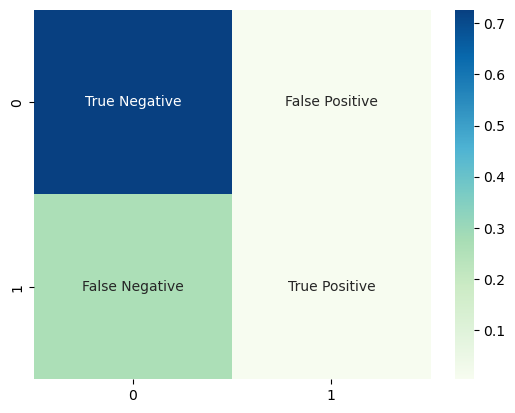

In [ ]:
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='GnBu')

In [ ]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      6961
           1       0.42      0.43      0.43      2573

    accuracy                           0.69      9534
   macro avg       0.60      0.61      0.61      9534
weighted avg       0.69      0.69      0.69      9534



[[5416 1545]
 [1455 1118]]


<Axes: >

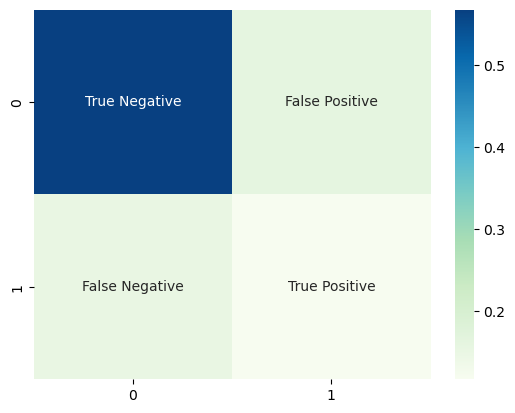

In [ ]:
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='GnBu')

In [ ]:
from sklearn.linear_model import LinearRegression
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, predictions))
print(math.sqrt(mean_squared_error(y_test, predictions)))

0.18853186610222142
0.434202563445014


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))

0.3807869599926493


In [ ]:
#Neural Network

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
 
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid', kernel_initializer='normal'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
696/696 [==============================] - 2s 2ms/step - loss: 151.4181
Epoch 2/100
696/696 [==============================] - 1s 2ms/step - loss: 1.1514
Epoch 3/100
696/696 [==============================] - 1s 2ms/step - loss: 1.1733
Epoch 4/100
696/696 [==============================] - 1s 2ms/step - loss: 1.5440
Epoch 5/100
696/696 [==============================] - 1s 2ms/step - loss: 1.4549
Epoch 6/100
696/696 [==============================] - 1s 2ms/step - loss: 1.2649
Epoch 7/100
696/696 [==============================] - 2s 2ms/step - loss: 1.2488
Epoch 8/100
696/696 [==============================] - 1s 2ms/step - loss: 1.4707
Epoch 9/100
696/696 [==============================] - 2s 2ms/step - loss: 1.2831
Epoch 10/100
696/696 [==============================] - 2s 2ms/step - loss: 1.4570
Epoch 11/100
696/696 [==============================] - 1s 2ms/step - loss: 1.3412
Epoch 12/100
696/696 [==============================] - 1s 2ms/step - loss: 1.4136
Epoch 13/10

In [ ]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)
print(classification_report(y_test,predictions))

298/298 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.00      0.01      6932
           1       0.27      1.00      0.43      2602

    accuracy                           0.28      9534
   macro avg       0.57      0.50      0.22      9534
weighted avg       0.70      0.28      0.12      9534



[[  25 6907]
 [   4 2598]]


<Axes: >

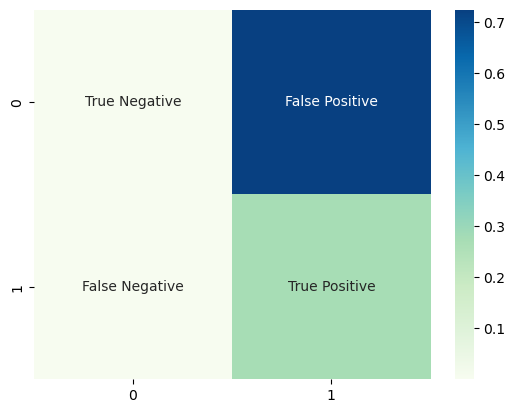

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test,predictions)
print(cf_matrix)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='GnBu')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X_train,y_train)
rf_original.oob_score_

0.7512587664089193